In [1]:
import pandas as pd
import numpy as np
from  zipfile import ZipFile
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt 

# SEMMA (SAS)

## Metodología CRISPDM (Cross Industry Standard Process for Data Mining)

<img src='CRISPDM.jpeg'>

#### Link competencia
#### https://www.kaggle.com/competitions/titanic/data

In [2]:
zip0=ZipFile("titanic.zip",mode='r')
zip0.extractall()

In [3]:
train_df= pd.read_csv("train.csv")

In [4]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.shape

(891, 12)

In [7]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

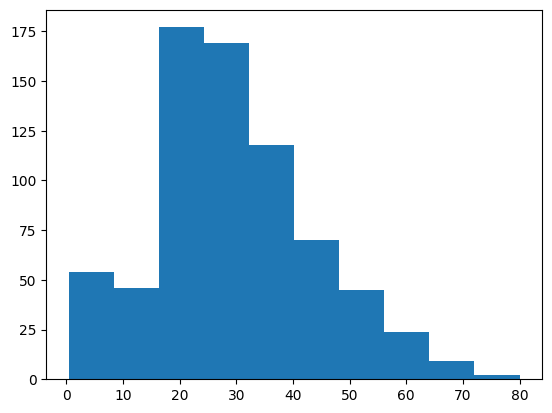

In [8]:
plt.hist(train_df['Age'])
plt.show()

In [9]:
train_df['Age'].dtype

dtype('float64')

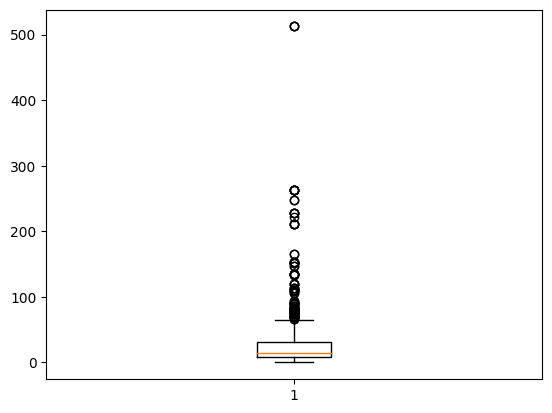

In [10]:
plt.boxplot(train_df['Fare'])
plt.show()

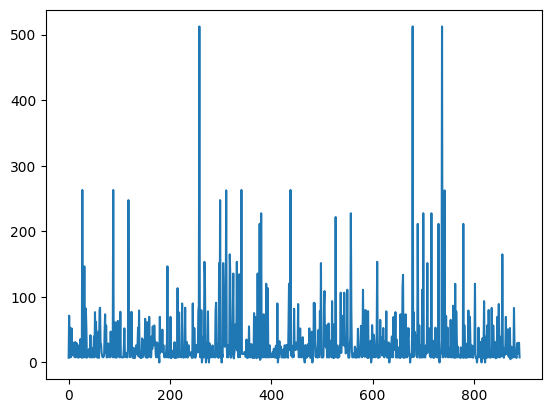

In [11]:
plt.plot(train_df['Fare'])
plt.show()

In [12]:
train_df.iloc[0,:]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [13]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Missing Values 

In [14]:
print("MISSIN VAlUES PERCENTAGE")
for i in enumerate(train_df.columns):
    print((i[1],sum(train_df[i[1]].isnull())/len(train_df[i[1]])))

MISSIN VAlUES PERCENTAGE
('PassengerId', 0.0)
('Survived', 0.0)
('Pclass', 0.0)
('Name', 0.0)
('Sex', 0.0)
('Age', 0.19865319865319866)
('SibSp', 0.0)
('Parch', 0.0)
('Ticket', 0.0)
('Fare', 0.0)
('Cabin', 0.7710437710437711)
('Embarked', 0.002244668911335578)


## Características de los datos de Titanic

<img src='titanic_notes.png'>



<img src='tinanic_notes_2.png'>

## LLenado de AGE

In [15]:
AGE_FILLER=train_df[['Sex','Age','Pclass','Parch','Embarked']].groupby(['Sex','Pclass','Parch','Embarked']).agg({'Age':np.nanmean})

In [16]:
AGE_FILLER

Age
Sex    Pclass Parch Embarked           
female 1      0     C         36.607143
                    Q         33.000000
                    S         34.960000
              1     C         40.571429
                    S         37.444444
              2     C         20.333333
                    S         22.800000
       2      0     C         21.800000
                    Q         30.000000
                    S         33.500000
              1     S         24.666667
              2     C         12.500000
                    S         22.222222
              3     S         39.000000
       3      0     C         14.750000
                    Q         19.687500
                    S         26.275000
              1     C         11.785714
                    Q         32.000000
                    S         16.769231
              2     C         15.000000
                    Q               NaN
                    S         13.312500
              3     C         24.000000
                    S         48.000000
              4     S         37.000000
              5     Q         39.000000
                    S         39.333333
              6     S         43.000000
male   1      0     C         39.880000
                    Q         44.000000
                    S         43.740385
              1     C         43.125000
                    S         45.333333
              2     C         34.000000
                    S         14.184000
              4     S         64.000000
       2      0     C         30.100000
                    Q         57.000000
                    S         33.554054
              1     C         31.000000
                    S         17.115385
              2     C         13.000000
                    S         24.443333
       3      0     C         27.285714
                    Q         37.000000
                    S         28.586111
              1     C         13.105000
                    Q         12.200000
                    S         16.944444
              2     S         10.884615
              3     S         16.000000
              4     S         40.000000
              5     S         39.000000

In [17]:
resp_=train_df.merge(right=AGE_FILLER,how='left',left_on=['Sex','Pclass','Parch','Embarked'],right_on=['Sex','Pclass','Parch','Embarked'])

In [18]:
resp_['Age_x'][resp_['Age_x'].isna()==True]=resp_['Age_y'][resp_['Age_x'].isna()==True]
resp_['Age_x'][resp_['Age_x'].isna()==True]=-1

/tmp/ipykernel_46943/4285108116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resp_['Age_x'][resp_['Age_x'].isna()==True]=resp_['Age_y'][resp_['Age_x'].isna()==True]
/tmp/ipykernel_46943/4285108116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resp_['Age_x'][resp_['Age_x'].isna()==True]=-1


In [19]:
resp_

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_y
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S,28.586111
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C,36.607143
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S,26.275000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S,34.960000
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S,28.586111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.0000,NaN,S,33.554054
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,30.0000,B42,S,34.960000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,13.3125,1,2,W./C. 6607,23.4500,NaN,S,13.312500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C,39.880000


In [20]:
train_df=resp_

In [21]:
for i in train_df.columns:
    print((i,train_df[i].dtypes))

('PassengerId', dtype('int64'))
('Survived', dtype('int64'))
('Pclass', dtype('int64'))
('Name', dtype('O'))
('Sex', dtype('O'))
('Age_x', dtype('float64'))
('SibSp', dtype('int64'))
('Parch', dtype('int64'))
('Ticket', dtype('O'))
('Fare', dtype('float64'))
('Cabin', dtype('O'))
('Embarked', dtype('O'))
('Age_y', dtype('float64'))


### Modelado 

In [22]:
X=train_df[['PassengerId','Age_x','Pclass','SibSp','Parch','Fare','Sex','Ticket','Embarked']]
y=train_df[['Survived']]

In [23]:
X.shape

(891, 9)

In [24]:
X.columns

Index(['PassengerId', 'Age_x', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex',
       'Ticket', 'Embarked'],
      dtype='object')

In [25]:
# X[numeric_vars+categorical_vars]

In [26]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_vars=['PassengerId','Age_x','Pclass','SibSp','Parch','Fare']
categorical_vars=['Sex','Ticket','Embarked']

scale_step=('scaler',MinMaxScaler())
num_pipe=Pipeline([scale_step])
num_transformation=[('num_transformations',num_pipe,numeric_vars)]

encoder_step=('encoder',OneHotEncoder())
cat_pipe=Pipeline([encoder_step])
cat_transformation=[('cat_transformations',cat_pipe,categorical_vars)]

col_transformer=ColumnTransformer(transformers=num_transformation+cat_transformation)
col_transformer.fit(X[numeric_vars+categorical_vars])
X2=col_transformer.transform(X[numeric_vars+categorical_vars])



In [27]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [28]:
np.random.seed(1234)
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.2,random_state=1234)

In [29]:
RFC=RandomForestClassifier(random_state=1234)
params={
    'n_estimators':range(50,200,50),
    'max_depth': range(2,20),
    'criterion':['gini','entropy']

}
RFC_mod=GridSearchCV(RFC,param_grid=params,cv=5,n_jobs=6)
RFC_mod.fit(X_train,np.ravel(y_train))

pred_RFC_mod=RFC_mod.predict(X_test)

In [30]:
RFC_mod.best_params_

{'criterion': 'gini', 'max_depth': 18, 'n_estimators': 100}

In [31]:
RFC_mod.best_score_

0.825844577957254

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score

In [33]:
print('Matriz de confusion:' , confusion_matrix(np.ravel(y_test),pred_RFC_mod))
print('Accuracy :' , accuracy_score(np.ravel(y_test),pred_RFC_mod))
print('Precision :' , precision_score(np.ravel(y_test),pred_RFC_mod))
print('Recall :' , recall_score(np.ravel(y_test),pred_RFC_mod))
print('AUC:' , roc_auc_score(np.ravel(y_test),pred_RFC_mod))
print('GINI:' , (2*roc_auc_score(np.ravel(y_test),pred_RFC_mod))-1)


Matriz de confusion: [[103   6]
 [ 24  46]]
Accuracy : 0.8324022346368715
Precision : 0.8846153846153846
Recall : 0.6571428571428571
AUC: 0.801048492791612
GINI: 0.6020969855832241


In [34]:
RFC_mod.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [35]:
RCF_adjusted=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=18,random_state=1234)
RCF_adjusted.fit(X_train,np.ravel(y_train))

RandomForestClassifier(criterion='entropy', max_depth=18, n_estimators=50,
                       random_state=1234)

In [36]:
importance=RCF_adjusted.feature_importances_



In [37]:
importance

array([5.72886345e-02, 6.56354886e-02, 6.07019773e-02, 2.83410866e-02,
       2.86657099e-02, 1.09405142e-01, 1.29200603e-01, 1.36510941e-01,
       1.94278546e-03, 7.32272984e-04, 2.49882137e-04, 1.13048034e-03,
       8.01249890e-05, 2.04236131e-04, 3.48718082e-04, 3.90909792e-04,
       1.18001446e-03, 2.78062342e-03, 1.12473500e-03, 1.41439572e-03,
       2.36927268e-04, 3.80712466e-04, 1.70585484e-04, 3.83313027e-04,
       7.07747547e-05, 1.72614211e-03, 7.53333872e-04, 4.56925638e-05,
       0.00000000e+00, 1.61813174e-04, 1.20949071e-04, 7.75109746e-04,
       8.63710081e-05, 0.00000000e+00, 0.00000000e+00, 1.35620186e-04,
       0.00000000e+00, 7.21211028e-04, 1.76708366e-04, 2.00767133e-04,
       3.90410895e-05, 5.24905104e-03, 2.59301988e-04, 4.01881629e-04,
       6.83048721e-04, 6.75765598e-03, 0.00000000e+00, 2.44311398e-04,
       1.60423777e-03, 0.00000000e+00, 6.50910245e-04, 1.29786937e-04,
       4.92352454e-04, 1.28603612e-03, 2.15452459e-04, 3.39297510e-04,
      

In [38]:
print(len(RCF_adjusted.feature_importances_))

693


In [39]:
feature_importance_tot=pd.DataFrame([i for i in enumerate(importance)])
feature_importance_tot.columns=['pos','importance']
feature_importance_tot.sort_values(by='importance',ascending=False,inplace=True)

In [40]:
feature_importance_tot[0:11]

,pos,importance
7,7,0.136511
6,6,0.129201
5,5,0.109405
1,1,0.065635
2,2,0.060702
0,0,0.057289
4,4,0.028666
3,3,0.028341
689,689,0.013123
691,691,0.011880


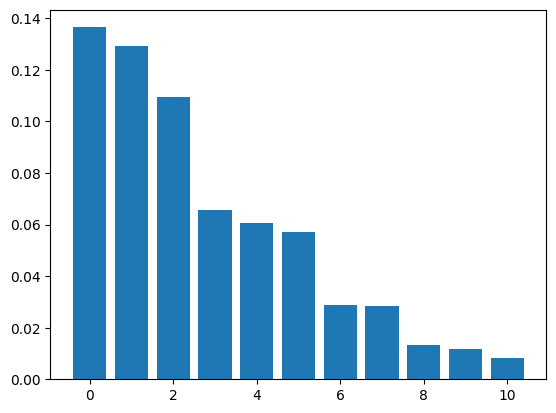

In [41]:
plt.bar(height=feature_importance_tot.iloc[0:11]['importance'],x=range(0,11))
plt.show()

In [42]:
GBC=GradientBoostingClassifier(random_state=1234)
params={
    'n_estimators':range(50,200,50),
    'max_depth': range(2,20),
    'learning_rate':np.arange(0.01,0.06,0.01)

}
GBC_mod=RandomizedSearchCV(GBC,params,cv=5,n_jobs=6)
GBC_mod.fit(X_train,np.ravel(y_train))

pred_GBC_mod=GBC_mod.predict(X_test)

In [43]:
print('Matriz de confusion:' , confusion_matrix(np.ravel(y_test),pred_GBC_mod))
print('Accuracy :' , accuracy_score(np.ravel(y_test),pred_GBC_mod))
print('Precision :' , precision_score(np.ravel(y_test),pred_GBC_mod))
print('Recall :' , recall_score(np.ravel(y_test),pred_GBC_mod))
print('AUC:' , roc_auc_score(np.ravel(y_test),pred_GBC_mod))
print('GINI:' , (2*roc_auc_score(np.ravel(y_test),pred_GBC_mod))-1)


Matriz de confusion: [[99 10]
 [20 50]]
Accuracy : 0.8324022346368715
Precision : 0.8333333333333334
Recall : 0.7142857142857143
AUC: 0.8112712975098297
GINI: 0.6225425950196595


In [44]:
X_train.shape

(712, 693)

In [45]:
y_train.shape

(712, 1)

In [46]:
import tensorflow as tf
import keras_tuner as kt

2023-08-22 11:10:05.784782: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-22 11:10:06.576629: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [47]:
class Modelo_IA(tf.keras.Model):
    
    def __init__(self,num_classes,hp_units0_0,hp_units0,hp_units1,hp_units2,hp_units3,hp_drop0_0,hp_drop0,hp_drop1,hp_drop2,hp_drop3,**kwargs):
        super().__init__(**kwargs)  
        self.num_classes=num_classes
        self.hp_units0_0=hp_units0_0
        self.hp_units0=hp_units0
        self.hp_units1=hp_units1
        self.hp_units2=hp_units2
        self.hp_units3=hp_units3
        self.hp_drop0_0=hp_drop0_0
        self.hp_drop0=hp_drop0
        self.hp_drop1=hp_drop1
        self.hp_drop2=hp_drop2
        self.hp_drop3=hp_drop3

        # self.inputs= tf.keras.Input(shape=(712,10))
        self.dense0_0= tf.keras.layers.Dense(units=self.hp_units0_0,activation='selu') 
        self.dropout0_0 = tf.keras.layers.Dropout(self.hp_drop0_0)
        self.dense0= tf.keras.layers.Dense(units=self.hp_units0,activation='selu') 
        self.dropout0 = tf.keras.layers.Dropout(self.hp_drop0)
        self.dense1= tf.keras.layers.Dense(units=self.hp_units1,activation='selu') 
        self.dropout1 = tf.keras.layers.Dropout(self.hp_drop1)
        self.dense2 = tf.keras.layers.Dense(units=self.hp_units2,activation='selu') 
        self.dropout2 = tf.keras.layers.Dropout(self.hp_drop2)
        self.dense3 = tf.keras.layers.Dense(units=self.hp_units3,activation='selu') 
        self.dropout3 = tf.keras.layers.Dropout(self.hp_drop3)
        self.batchn = tf.keras.layers.BatchNormalization()
        self.dense4 = tf.keras.layers.Dense(units=self.num_classes,activation='sigmoid') 

    def call(self,input):
       print(input.shape)
       x = self.dense0_0 (input)
       x = self.dropout0_0 (x)
      #  x = self.batchn(x)
    #    x = self.inputs(input)
       x = self.dense0 (x)
       x = self.dropout0 (x)
       
       x = self.dense1 (x)
       x = self.dropout1 (x)
       
       x = self.dense2 (x)
       x = self.dropout2 (x)
       
       x = self.dense3 (x)
       x = self.dropout3 (x)
       x = self.batchn(x)
       output = self.dense4(x)

       return output
       


In [48]:
X_train.shape

(712, 693)

In [49]:
for i in X_train[0]:
    print (i)

  (0, 0)	0.1404494382022472
  (0, 1)	0.16049382716049382
  (0, 2)	1.0
  (0, 3)	0.125
  (0, 5)	0.021942337075458514
  (0, 7)	1.0
  (0, 194)	1.0
  (0, 689)	1.0


In [50]:
for i in X_train[1]:
    print (i)

  (0, 0)	0.3426966292134832
  (0, 1)	0.023703703703703703
  (0, 3)	0.125
  (0, 4)	0.3333333333333333
  (0, 5)	0.29580589980036276
  (0, 7)	1.0
  (0, 45)	1.0
  (0, 691)	1.0


In [51]:
for i in X_train[2]:
    print (i)

  (0, 0)	0.7089887640449438
  (0, 1)	0.6419753086419753
  (0, 2)	1.0
  (0, 5)	0.013768881414528002
  (0, 7)	1.0
  (0, 353)	1.0
  (0, 691)	1.0


In [52]:
for i in X_train[3]:
    print (i)

  (0, 0)	0.7224719101123596
  (0, 1)	0.36526063100137174
  (0, 2)	1.0
  (0, 5)	0.11027245763075773
  (0, 7)	1.0
  (0, 88)	1.0
  (0, 691)	1.0


In [53]:
# X['Age_x']=X['Age_x'].apply(lambda x : np.round(x,decimals=0))
# X['Fare']=X['Fare'].apply(lambda x : np.round(x,decimals=0))


In [54]:
numeric_vars

['PassengerId', 'Age_x', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [55]:
X[numeric_vars]

,PassengerId,Age_x,Pclass,SibSp,Parch,Fare
0,1,22.0000,3,1,0,7.2500
1,2,38.0000,1,1,0,71.2833
2,3,26.0000,3,0,0,7.9250
3,4,35.0000,1,1,0,53.1000
4,5,35.0000,3,0,0,8.0500
...,...,...,...,...,...,...
886,887,27.0000,2,0,0,13.0000
887,888,19.0000,1,0,0,30.0000
888,889,13.3125,3,1,2,23.4500
889,890,26.0000,1,0,0,30.0000


In [56]:
print(max(X['Pclass']))
print(min(X['Pclass']))

3
1


In [57]:
X['Pclass']/(max(X['Pclass'])-min(X['Pclass']))

0      1.5
1      0.5
2      1.5
3      0.5
4      1.5
      ... 
886    1.0
887    0.5
888    1.5
889    0.5
890    1.5
Name: Pclass, Length: 891, dtype: float64

In [58]:
def min_max_encoder_local(array):
    return (array/(np.max(array)-np.min(array)))
    

In [59]:

for i in X.columns:
    if i in numeric_vars:
        X[i]=np.asarray(X[i]).astype(np.float32)
        X[i]=min_max_encoder_local(X[i])

/tmp/ipykernel_46943/95992197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=np.asarray(X[i]).astype(np.float32)
/tmp/ipykernel_46943/95992197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=min_max_encoder_local(X[i])


In [60]:
def One_hot_local(array):
    array_copy=array.copy()
    array_copy[array_copy.isnull()==True]='NAN'
    uni_values=np.sort(np.append(array_copy.unique(),'other'))
    for val in enumerate(uni_values):
        array_copy[array_copy==val[1]]=val[0]

    return array_copy,uni_values

# print(enumerate())


In [61]:
X['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [62]:
One_hot_local(X['Sex'])

(0      1
 1      0
 2      0
 3      0
 4      1
       ..
 886    1
 887    0
 888    0
 889    1
 890    1
 Name: Sex, Length: 891, dtype: object,
 array(['female', 'male', 'other'], dtype=object))

In [63]:
verbatim=[]
for i in X.columns:
    if i in categorical_vars:
        print(i)
        X[i],verbatims= One_hot_local(X[i])
        X[i]=np.asarray(X[i]).astype(np.float32)
        verbatim.append(verbatims)


Sex
Ticket


/tmp/ipykernel_46943/738163752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i],verbatims= One_hot_local(X[i])
/tmp/ipykernel_46943/738163752.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=np.asarray(X[i]).astype(np.float32)
/tmp/ipykernel_46943/738163752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Embarked


/tmp/ipykernel_46943/738163752.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=np.asarray(X[i]).astype(np.float32)
/tmp/ipykernel_46943/738163752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i],verbatims= One_hot_local(X[i])
/tmp/ipykernel_46943/738163752.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [64]:
X

,PassengerId,Age_x,Pclass,SibSp,Parch,Fare,Sex,Ticket,Embarked
0,0.001124,0.271605,1.5,0.125,0.000000,0.014151,1.0,523.0,3.0
1,0.002247,0.469136,0.5,0.125,0.000000,0.139136,0.0,596.0,0.0
2,0.003371,0.320988,1.5,0.000,0.000000,0.015469,0.0,669.0,3.0
3,0.004494,0.432099,0.5,0.125,0.000000,0.103644,0.0,49.0,3.0
4,0.005618,0.432099,1.5,0.000,0.000000,0.015713,1.0,472.0,3.0
...,...,...,...,...,...,...,...,...,...
886,0.996629,0.333333,1.0,0.000,0.000000,0.025374,1.0,101.0,3.0
887,0.997753,0.234568,0.5,0.000,0.000000,0.058556,0.0,14.0,3.0
888,0.998876,0.164352,1.5,0.125,0.333333,0.045771,0.0,675.0,3.0
889,1.000000,0.320988,0.5,0.000,0.000000,0.058556,1.0,8.0,0.0


In [65]:
np.random.seed(1234)
X_train_ANN,X_test_ANN,y_train_ANN,y_test_ANN=train_test_split(X,y,test_size=0.2,random_state=1234)
TF_dataset_train=tf.data.Dataset.from_tensor_slices((dict(X_train_ANN),np.ravel(y_train_ANN)))
TF_dataset_test=tf.data.Dataset.from_tensor_slices((dict(X_test_ANN),np.ravel(y_test_ANN)))

2023-08-22 11:10:08.107959: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-22 11:10:08.133814: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-22 11:10:08.134046: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [66]:
X_train_ANN.shape

(712, 9)

In [67]:
np.random.seed(1234)
x_AI=TF_dataset_train.batch(X_train_ANN.shape[0]).shuffle(X_train_ANN.shape[0]).take(X_train_ANN.shape[0])


In [68]:
for i in x_AI:
    x_AI_2=i[0]
    y_AI_2=i[1]

2023-08-22 11:10:08.755904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_6' with dtype float and shape [712]
	 [[{{node Placeholder/_6}}]]
2023-08-22 11:10:08.756227: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype float and shape [712]
	 [[{{node Placeholder/_4}}]]


In [69]:
x_AI_test=TF_dataset_test.batch(X_test_ANN.shape[0]).take(X_test_ANN.shape[0])

In [70]:
for i in x_AI_test:
    x_AI_2_test=i[0]
    y_AI_2_test=i[1]

2023-08-22 11:10:08.778641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_6' with dtype float and shape [179]
	 [[{{node Placeholder/_6}}]]
2023-08-22 11:10:08.778930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype int64 and shape [179]
	 [[{{node Placeholder/_9}}]]


In [71]:
x_AI_2

{'PassengerId': <tf.Tensor: shape=(712,), dtype=float32, numpy=
 array([0.14157303, 0.3438202 , 0.71011233, 0.7235955 , 0.9089888 ,
        0.30674157, 0.6269663 , 0.23146068, 0.7449438 , 0.5258427 ,
        0.5292135 , 0.25617978, 0.0752809 , 0.7842697 , 0.01011236,
        0.47191012, 0.9044944 , 0.47977528, 0.23258427, 0.7977528 ,
        0.60674155, 0.5370787 , 0.05842697, 0.40786517, 0.56179774,
        0.51910114, 0.2955056 , 0.21910113, 0.13370787, 0.19325842,
        0.63820225, 0.0505618 , 0.6741573 , 0.43595505, 0.68876404,
        0.21123596, 0.33483145, 0.952809  , 0.70561796, 0.5449438 ,
        0.10898876, 0.79438204, 0.24606742, 0.5797753 , 0.19213483,
        0.5494382 , 0.0483146 , 0.46179774, 0.16629213, 0.88988763,
        0.9853933 , 0.4483146 , 0.4741573 , 0.16404495, 0.5674157 ,
        0.21685393, 0.0764045 , 0.07977528, 0.17752808, 0.07078651,
        0.3494382 , 0.13707866, 0.76516855, 0.07865169, 0.36741573,
        0.31235954, 0.04157303, 0.4966292 , 0.787640

In [72]:
len(x_AI_2.keys())

9

In [73]:
def array_transforming_function(data):

    for i in enumerate(data.keys()):
        if (i[0]==0):
            temp=(np.array(data[i[1]]))
            n=len(temp)
        else:
            new_temp=np.array(data[i[1]])
            temp = np.concatenate([temp,new_temp],axis=0)



    temp0=(temp.reshape((len(data.keys()),n)).T)
    return temp0
# labels=[]
# labels.append(np.array(y_AI_2))


In [74]:
x_new=array_transforming_function(x_AI_2)
labels=np.array(y_AI_2)

In [75]:
x_new_test=array_transforming_function(x_AI_2_test)
labels_test=np.array(y_AI_2_test)

In [76]:
x_new.shape

(712, 9)

In [77]:
labels.shape

(712,)

In [78]:
# for i in X_train_ANN_f:
#     print(i[0].keys())


In [79]:
EPOCHS=80
BATCH_SIZE=3

# model = Modelo_IA(num_classes=1)
# model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9,nesterov=True),
#               metrics=['Recall','Precision'],
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=False)

#               )

# model.fit(x_new,labels,batch_size=BATCH_SIZE,epochs=100,validation_split=0.2)

In [80]:
# model.summary()

In [81]:
def model_hp(hp):
    hp_units0_0=hp.Int('units_0_0',min_value=0,max_value=1024,step=512)
    hp_units0=hp.Int('units_0',min_value=0,max_value=512,step=256)
    hp_units1=hp.Int('units_1',min_value=0,max_value=256,step=128)
    hp_units2=hp.Int('units_2',min_value=0,max_value=128,step=64)
    hp_units3=hp.Int('units_3',min_value=0,max_value=64,step=32)
    hp_drop0_0=hp.Float('drop_0_0',min_value=0.0,max_value=0.6,step=0.1)
    hp_drop0=hp.Float('drop_0',min_value=0.0,max_value=0.6,step=0.1)
    hp_drop1=hp.Float('drop_1',min_value=0.0,max_value=0.6,step=0.1)
    hp_drop2=hp.Float('drop_2',min_value=0.0,max_value=0.6,step=0.1)
    hp_drop3=hp.Float('drop_3',min_value=0.0,max_value=0.6,step=0.1)

    model=Modelo_IA(num_classes=1,hp_units0_0=hp_units0_0,hp_units0=hp_units0,hp_units1=hp_units1,hp_units2=hp_units2,hp_units3=hp_units3,
                    hp_drop0_0=hp_drop0_0,hp_drop0=hp_drop0,hp_drop1=hp_drop1,hp_drop2=hp_drop2,hp_drop3=hp_drop3)
    hp_learning_rate=hp.Choice('learning_rate',values=[1e-2,2e-2,3e-2,4e-2,5e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
    hp_BETA1=hp.Choice('beta1',values=[0.85,0.9,0.95])
    hp_BETA2=hp.Choice('beta2',values=[0.9,0.95,0.99])
    # hp_momentum=hp.Choice('momentum',values=[0.85,0.9,0.95,0.99])
    # model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=hp_learning_rate,momentum=hp_momentum),
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate,beta_1=hp_BETA1,beta_2=hp_BETA2),
                  metrics=['Recall','Precision','AUC'],
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False)
                  )
    return model 



In [82]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_auc',patience=5)

In [83]:
tuner = kt.Hyperband(
    model_hp,
    objective=kt.Objective(name='val_auc',direction='max'),
    max_epochs=EPOCHS,
    project_name='model_all_data4',
    overwrite=True,
)

In [84]:
tuner.search(x_new,labels,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(x_new_test,labels_test),validation_steps=35,shuffle=True)

Trial 90 Complete [00h 01m 21s]
val_auc: 0.5

Best val_auc So Far: 0.8373968005180359
Total elapsed time: 00h 27m 22s
INFO:tensorflow:Oracle triggered exit


In [93]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


In [94]:
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units_0_0')},{best_hps.get('units_0')}, {best_hps.get('units_1')} , {best_hps.get('units_2')} , {best_hps.get('units_3')},{best_hps.get('drop_0_0')}  ,{best_hps.get('drop_0')} ,{best_hps.get('drop_1')} , {best_hps.get('drop_2')} , {best_hps.get('drop_3')},  and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}, the beta1 selected was {best_hps.get('beta1')}, the beta2 selected was {best_hps.get('beta2')} .
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 1024,256, 256 , 128 , 64,0.4  ,0.4 ,0.30000000000000004 , 0.30000000000000004 , 0.0,  and the optimal learning rate for the optimizer
is 0.04, the beta1 selected was 0.95, the beta2 selected was 0.9 .



In [95]:
model=tuner.hypermodel.build(best_hps)

In [96]:
np.random.seed(1234)
history=model.fit(x_new,labels,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(x_new_test,labels_test),validation_steps=35,callbacks=[early_stop],shuffle=False)


Epoch 1/80
(None, 9)
(None, 9)
238/238 [==============================] - 4s 5ms/step - loss: 0.7302 - recall: 0.2831 - precision: 0.4162 - auc: 0.5312 - val_loss: 0.7020 - val_recall: 0.0698 - val_precision: 0.6000 - val_auc: 0.5910
Epoch 2/80
238/238 [==============================] - 1s 4ms/step - loss: 0.6763 - recall: 0.2132 - precision: 0.4328 - auc: 0.5544 - val_loss: 0.6846 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.5895
Epoch 3/80
238/238 [==============================] - 1s 4ms/step - loss: 0.6731 - recall: 0.2096 - precision: 0.4634 - auc: 0.5704 - val_loss: 0.6805 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.5930
Epoch 4/80
238/238 [==============================] - 1s 4ms/step - loss: 0.6776 - recall: 0.1728 - precision: 0.4393 - auc: 0.5557 - val_loss: 0.6841 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.4032
Epoch 5/80
238/238 [==============================] - 1s 4ms/step - loss: 0.6731 - recall: 0.2610 - 

In [107]:
val_auc_per_epoch = history.history['val_auc']
best_epoch = val_auc_per_epoch.index(max(val_auc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 45


In [108]:
val_auc_per_epoch

[0.5909602642059326,
 0.5894598960876465,
 0.5930232405662537,
 0.4032258093357086,
 0.5941485166549683,
 0.5960240364074707,
 0.5962115526199341,
 0.5963990688323975,
 0.5969617366790771,
 0.5990247130393982,
 0.5995873212814331,
 0.6007126569747925,
 0.6027756929397583,
 0.6020255088806152,
 0.6022130250930786,
 0.6067141890525818,
 0.6057764291763306,
 0.6129032373428345,
 0.6179670095443726,
 0.6211552619934082,
 0.6269692778587341,
 0.6303451061248779,
 0.6451613306999207,
 0.6710427403450012,
 0.7016128897666931,
 0.7271192073822021,
 0.764253556728363,
 0.6479744911193848,
 0.8012003898620605,
 0.7573144435882568,
 0.8088897466659546,
 0.7528132200241089,
 0.8118904829025269,
 0.7899474501609802,
 0.802513062953949,
 0.8210802674293518,
 0.8160164952278137,
 0.8117029070854187,
 0.7758814692497253,
 0.8225806951522827,
 0.806451678276062,
 0.815453827381134,
 0.8117029070854187,
 0.7794448733329773,
 0.8233307600021362,
 0.8160164952278137,
 0.8060765266418457,
 0.43717178702354

In [149]:
hypermodel=tuner.hypermodel.build(best_hps)
hypermodel.fit(x_new,labels,batch_size=BATCH_SIZE,epochs=37,validation_data=(x_new_test,labels_test),validation_steps=35,callbacks=[early_stop],shuffle=False)

Epoch 1/37
(None, 9)
(None, 9)
238/238 [==============================] - 4s 6ms/step - loss: 0.7597 - recall: 0.3015 - precision: 0.4020 - auc: 0.5365 - val_loss: 0.7638 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.5906
Epoch 2/37
238/238 [==============================] - 1s 4ms/step - loss: 0.6876 - recall: 0.2537 - precision: 0.4157 - auc: 0.5489 - val_loss: 0.6980 - val_recall: 0.3023 - val_precision: 0.7222 - val_auc: 0.5908
Epoch 3/37
238/238 [==============================] - 1s 4ms/step - loss: 0.6790 - recall: 0.2574 - precision: 0.4403 - auc: 0.5687 - val_loss: 0.6815 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.5921
Epoch 4/37
238/238 [==============================] - 1s 4ms/step - loss: 0.6822 - recall: 0.1654 - precision: 0.3782 - auc: 0.5418 - val_loss: 0.6800 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.5938
Epoch 5/37
238/238 [==============================] - 1s 4ms/step - loss: 0.6775 - recall: 0.2353 - 

In [150]:
prediction_IA=hypermodel.predict(x_new_test)


(None, 9)
6/6 [==============================] - 0s 2ms/step


In [151]:
x_new_test

array([[5.8876407e-01, 5.4320985e-01, 5.0000000e-01, ..., 0.0000000e+00,
        7.0000000e+00, 0.0000000e+00],
       [8.7528092e-01, 4.5679012e-01, 1.5000000e+00, ..., 1.0000000e+00,
        4.5000000e+02, 2.0000000e+00],
       [8.5505617e-01, 3.5291496e-01, 1.5000000e+00, ..., 1.0000000e+00,
        4.2000000e+02, 3.0000000e+00],
       ...,
       [2.5056180e-01, 6.2962961e-01, 1.5000000e+00, ..., 1.0000000e+00,
        1.0200000e+02, 3.0000000e+00],
       [5.5730337e-01, 3.3686069e-01, 1.5000000e+00, ..., 1.0000000e+00,
        1.7600000e+02, 0.0000000e+00],
       [1.1235955e-01, 4.1975307e-01, 1.0000000e+00, ..., 1.0000000e+00,
        1.5000000e+02, 3.0000000e+00]], dtype=float32)

In [152]:
print(np.max(prediction_IA))
print(np.min(prediction_IA))

0.9996437
0.13448007


In [153]:
print(np.ceil(np.round(np.max(prediction_IA),decimals=1)))
print(np.floor(np.round(np.min(prediction_IA),decimals=1)))

1.0
0.0


In [154]:
pred_IA=np.round(prediction_IA,decimals=0)

In [155]:
sum(pred_IA)

array([47.], dtype=float32)

In [156]:
print('Matriz de confusion:' , confusion_matrix(np.ravel(labels_test),pred_IA))
print('Accuracy :' , accuracy_score(np.ravel(labels_test),pred_IA))
print('Precision :' , precision_score(np.ravel(labels_test),pred_IA))
print('Recall :' , recall_score(np.ravel(labels_test),pred_IA))
print('AUC:' , roc_auc_score(np.ravel(labels_test),pred_IA))
print('GINI:' , (2*roc_auc_score(np.ravel(labels_test),pred_IA))-1)

Matriz de confusion: [[97 12]
 [35 35]]
Accuracy : 0.7374301675977654
Precision : 0.7446808510638298
Recall : 0.5
AUC: 0.6949541284403671
GINI: 0.38990825688073416


In [99]:
hypermodel.save('modelo_IA_base4')

(None, 9)
(None, 9)
(None, 9)
(None, 9)
(None, 9)


2023-08-22 01:45:36.310345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1024]
	 [[{{node inputs}}]]
2023-08-22 01:45:36.327754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256]
	 [[{{node inputs}}]]
2023-08-22 01:45:36.360465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256]
	 [[{{node inputs}}]]
2023-08-22 01:4

(None, 9)
(None, 9)
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(9, 1024), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fe4007b39a0>, 140617766566096), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1024,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fe400741d90>, 140617766567056), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1024, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fe400754c40>, 140617766731824), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fe400769b50>, 140617766732592), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSp

2023-08-22 01:45:36.950785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1024]
	 [[{{node inputs}}]]
2023-08-22 01:45:37.019374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256]
	 [[{{node inputs}}]]
2023-08-22 01:45:37.069302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256]
	 [[{{node inputs}}]]
2023-08-22 01:4

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(9, 1024), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fe4007b39a0>, 140617766566096), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1024,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fe400741d90>, 140617766567056), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1024, 256), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fe400754c40>, 140617766731824), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fe400769b50>, 140617766732592), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(256, 256),

INFO:tensorflow:Assets written to: modelo_IA_base4/assets


INFO:tensorflow:Assets written to: modelo_IA_base4/assets
